In [1]:
import pandas as pd
import numpy as np
import datetime
import time

from scipy.optimize import least_squares

from features.create_csv import *
from features.athlete_profile import *

In [438]:
# Example usage
start_time = datetime.datetime(2022, 3, 5, 12, 0, 0)
duration = datetime.timedelta(minutes=5)
sport = 'Bike'
distance = 1000  # in meters
hr = 190

# Convert duration to seconds
duration_seconds = duration.total_seconds()

# Format duration as HH:MM:SS string
duration_str = datetime.datetime.utcfromtimestamp(duration_seconds).strftime('%H:%M:%S')

# Create trackpoints
trackpoints = []
for i in range(0, distance + 100, 100):
    time_delta = datetime.timedelta(seconds=(duration_seconds * i) // distance)
    time = start_time + time_delta
    trackpoint = f"""
            <Trackpoint>
                <Time>{time.isoformat()}Z</Time>
                <Position>
                    <LatitudeDegrees>43.7015550</LatitudeDegrees>
                    <LongitudeDegrees>5.6726370</LongitudeDegrees>
                </Position>
                <HeartRateBpm>
                    <Value>{hr}</Value>
                </HeartRateBpm>
                <DistanceMeters>{i}</DistanceMeters>
            </Trackpoint>
    """
    trackpoints.append(trackpoint)

# Combine trackpoints into a string
trackpoints_str = ''.join(trackpoints)

# Create TCX file string
tcx = f"""<?xml version='1.0' encoding='utf-8'?>
<TrainingCenterDatabase xmlns:ns2="http://www.garmin.com/xmlschemas/UserProfile/v2" xmlns:ns3="http://www.garmin.com/xmlschemas/ActivityExtension/v2" xmlns:ns4="http://www.garmin.com/xmlschemas/ProfileExtension/v1" xmlns:ns5="http://www.garmin.com/xmlschemas/ActivityGoals/v1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2" xsi:schemaLocation="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2 http://www.garmin.com/xmlschemas/TrainingCenterDatabasev2.xsd">
            <Activities>
              <Activity Sport="{sport}">
      <Id>{start_time.isoformat()}Z</Id>
      <Lap StartTime="{start_time.isoformat()}Z">
        <TotalTimeSeconds>{duration_seconds:.0f}</TotalTimeSeconds>
        <DistanceMeters>{distance}</DistanceMeters>
        <MaximumSpeed>0.0</MaximumSpeed>
        <Calories>0</Calories>
        <AverageHeartRateBpm>
          <Value>{hr}</Value>
        </AverageHeartRateBpm>
        <MaximumHeartRateBpm>
          <Value>{hr}</Value>
        </MaximumHeartRateBpm>
        <Intensity>Active</Intensity>
        <TriggerMethod>Manual</TriggerMethod>
        <Track>
          {trackpoints_str}
        </Track>
      </Lap>
    </Activity>
            </Activities>
            
          </TrainingCenterDatabase>
"""

# Save TCX file
with open(f'{distance}_{hr}.tcx', 'w') as f:
    f.write(tcx)


#### Automate

In [320]:
import os

path = "./tcx_files_generated/"
os.makedirs(path, exist_ok=True) # Create the directory if it doesn't exist


def generate_tcx(start_time, duration, sport, distance, hr):
    # Convert duration to seconds
    duration_seconds = duration.total_seconds()

    # Format duration as HH:MM:SS string
    duration_str = datetime.datetime.utcfromtimestamp(duration_seconds).strftime('%H:%M:%S')

    # Create trackpoints
    trackpoints = []
    for i in range(0, distance + 100, 100):
        time_delta = datetime.timedelta(seconds=(duration_seconds * i) // distance)
        time = start_time + time_delta
        trackpoint = f"""
                <Trackpoint>
                    <Time>{time.isoformat()}Z</Time>
                    <Position>
                        <LatitudeDegrees>43.7015550</LatitudeDegrees>
                        <LongitudeDegrees>5.6726370</LongitudeDegrees>
                    </Position>
                    <HeartRateBpm>
                        <Value>{hr}</Value>
                    </HeartRateBpm>
                    <DistanceMeters>{i}</DistanceMeters>
                </Trackpoint>
        """
        trackpoints.append(trackpoint)

    # Combine trackpoints into a string
    trackpoints_str = ''.join(trackpoints)

    # Create TCX file string
    tcx = f"""<?xml version='1.0' encoding='utf-8'?>
    <TrainingCenterDatabase xmlns:ns2="http://www.garmin.com/xmlschemas/UserProfile/v2" xmlns:ns3="http://www.garmin.com/xmlschemas/ActivityExtension/v2" xmlns:ns4="http://www.garmin.com/xmlschemas/ProfileExtension/v1" xmlns:ns5="http://www.garmin.com/xmlschemas/ActivityGoals/v1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2" xsi:schemaLocation="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2 http://www.garmin.com/xmlschemas/TrainingCenterDatabasev2.xsd">
                <Activities>
                  <Activity Sport="{sport}">
          <Id>{start_time.isoformat()}Z</Id>
          <Lap StartTime="{start_time.isoformat()}Z">
            <TotalTimeSeconds>{duration_seconds:.0f}</TotalTimeSeconds>
            <DistanceMeters>{distance}</DistanceMeters>
            <MaximumSpeed>0.0</MaximumSpeed>
            <Calories>0</Calories>
            <AverageHeartRateBpm>
              <Value>{hr}</Value>
            </AverageHeartRateBpm>
            <MaximumHeartRateBpm>
              <Value>{hr}</Value>
            </MaximumHeartRateBpm>
            <Intensity>Active</Intensity>
            <TriggerMethod>Manual</TriggerMethod>
            <Track>
              {trackpoints_str}
            </Track>
          </Lap>
        </Activity>
                </Activities>
                
              </TrainingCenterDatabase>
    """

    return tcx


##### Loop

In [373]:
# Import necessary libraries
import datetime
import os

# Create directory to store TCX files
path = "./tcx_files_generated/"
os.makedirs(path, exist_ok=True)

# Define the sport type and heart rate range
sport = "Bike"
hr_range = range(170, 187, 5)

# Define the distances and durations for which TCX files will be generated
distances = [5000, 10000, 20000, 30000]
durations = [30, 60, 120, 180]

current_date = datetime.datetime(2021, 4, 5, 12, 0, 0)
# Loop over heart rates and generate TCX files
for hr in hr_range:
    for distance, duration in zip(distances, durations):

        # Set start time value
        start_time = current_date

        # Convert duration to timedelta object
        duration_td = datetime.timedelta(minutes=duration)

        # Generate TCX
        tcx = generate_tcx(start_time, duration_td, sport, distance, hr)

        # Save TCX file
        filename = f'{hr}_{distance}.tcx'
        filepath = f'{path}/{filename}'
        with open(filepath, 'w') as f:
            f.write(tcx)
        
        # Add 1 day to start_time for each iteration
        current_date += datetime.timedelta(days=1)


##### Multiple HR

In [ ]:
import datetime

def generate_tcx(distance, hr, start_time, duration):
    # Convert duration to seconds
    duration_seconds = duration.total_seconds()

    # Format duration as HH:MM:SS string
    duration_str = datetime.datetime.utcfromtimestamp(duration_seconds).strftime('%H:%M:%S')

    # Create trackpoints
    trackpoints = []
    for i in range(0, distance + 100, 100):
        time_delta = datetime.timedelta(seconds=(duration_seconds * i) // distance)
        time = start_time + time_delta
        
        if i < distance * 0.1:
            curr_hr = 110
        elif i < distance * 0.3:
            curr_hr = 140
        elif i < distance * 0.5:
            curr_hr = 160
        elif i < distance * 0.7:
            curr_hr = 180
        else:
            curr_hr = 200
        
        trackpoint = f"""
                <Trackpoint>
                    <Time>{time.isoformat()}Z</Time>
                    <Position>
                        <LatitudeDegrees>43.7015550</LatitudeDegrees>
                        <LongitudeDegrees>5.6726370</LongitudeDegrees>
                    </Position>
                    <HeartRateBpm>
                        <Value>{curr_hr}</Value>
                    </HeartRateBpm>
                    <DistanceMeters>{i}</DistanceMeters>
                </Trackpoint>
        """
        trackpoints.append(trackpoint)

    # Combine trackpoints into a string
    trackpoints_str = ''.join(trackpoints)

    # Create TCX file string
    tcx = f"""<?xml version='1.0' encoding='utf-8'?>
    <TrainingCenterDatabase xmlns:ns2="http://www.garmin.com/xmlschemas/UserProfile/v2" xmlns:ns3="http://www.garmin.com/xmlschemas/ActivityExtension/v2" xmlns:ns4="http://www.garmin.com/xmlschemas/ProfileExtension/v1" xmlns:ns5="http://www.garmin.com/xmlschemas/ActivityGoals/v1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2" xsi:schemaLocation="http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2 http://www.garmin.com/xmlschemas/TrainingCenterDatabasev2.xsd">
                <Activities>
                  <Activity Sport="Bike">
          <Id>{start_time.isoformat()}Z</Id>
          <Lap StartTime="{start_time.isoformat()}Z">
            <TotalTimeSeconds>{duration_seconds:.0f}</TotalTimeSeconds>
            <DistanceMeters>{distance}</DistanceMeters>
            <MaximumSpeed>0.0</MaximumSpeed>
            <Calories>0</Calories>
            <AverageHeartRateBpm>
              <Value>{hr}</Value>
            </AverageHeartRateBpm>
            <MaximumHeartRateBpm>
              <Value>{hr}</Value>
            </MaximumHeartRateBpm>
            <Intensity>Active</Intensity>
            <TriggerMethod>Manual</TriggerMethod>
            <Track>
              {trackpoints_str}
            </Track>
          </Lap>
        </Activity>
                </Activities>
                
              </TrainingCenterDatabase>
    """
    
    # Save TCX file
    with open(f'{distance}_{hr}.tcx', 'w') as f:


## Redownload from Strava

In [2]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "103516",
    'client_secret': 'b40c81457b89385de62db246c50006bb38f89ef9',
    'refresh_token': 'd7b5ad48dd6d68f1cde587937e96a2aefb87081a',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["summary_polyline"])

Requesting Token...

Access Token = e18e02c1087303b587369cfeff41de8bfb74a227

1km_190bpm
umviG}|ra@??


In [3]:
import pandas as pd
from pandas.io.json import json_normalize

activities = pd.json_normalize(my_dataset)
activities.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,...,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state
0,2,1km_190bpm,1000.0,300,300,0.0,Ride,Ride,NaN,8690021393,...,False,0,0,False,21.0,114752191,1,a8690021393,umviG}|ra@??,2
1,2,1km_180bpm,1000.0,300,300,0.0,Ride,Ride,NaN,8690021397,...,False,0,0,False,19.0,114752191,1,a8690021397,umviG}|ra@??,2
2,2,1km_170bpm,1000.0,300,300,0.0,Ride,Ride,NaN,8690021382,...,False,0,0,False,14.0,114752191,1,a8690021382,umviG}|ra@??,2
3,2,1km_160bpm,1000.0,300,300,0.0,Ride,Ride,NaN,8690021385,...,False,0,0,False,9.0,114752191,1,a8690021385,umviG}|ra@??,2
4,2,1km_150bpm,1000.0,300,300,0.0,Ride,Ride,NaN,8690021381,...,False,0,0,False,7.0,114752191,1,a8690021381,umviG}|ra@??,2


In [4]:
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state'],
      dtype='object')

In [5]:
activities = activities[['name', 'distance', 'moving_time', 'id', 'start_date_local', 'average_speed', 'max_speed', 'average_heartrate', 'max_heartrate', 'suffer_score']]
# Rename column
activities = activities.rename(columns={'suffer_score': 'relative_effort'})
activities.head()

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort
0,1km_190bpm,1000.0,300,8690021393,2022-03-05T13:00:00Z,3.333,3.333,190.0,190.0,21.0
1,1km_180bpm,1000.0,300,8690021397,2022-03-04T13:00:00Z,3.333,3.333,180.0,180.0,19.0
2,1km_170bpm,1000.0,300,8690021382,2022-03-03T13:00:00Z,3.333,3.333,170.0,170.0,14.0
3,1km_160bpm,1000.0,300,8690021385,2022-03-02T13:00:00Z,3.333,3.333,160.0,160.0,9.0
4,1km_150bpm,1000.0,300,8690021381,2022-03-01T13:00:00Z,3.333,3.333,150.0,150.0,7.0


In [6]:
# save as csv
activities.to_csv('data/strava_test_activities.csv')

In [7]:
#Convert the tcx
strava_test_tcx_csv('data/strava_test_tcx/', 'data/strava_test_activities.csv', 'data/strava_test_csv/')

## Finding strava Relative Effort Measure

- Based on a modified version of Banister's TRIMP
    - https://www.trainingimpulse.com/banisters-trimp-0
    - TRIMP = Durée (min) * Intensité (%) * Facteur de pondération (https://www.tripassion.fr/trimp/)
        - Facteur de pondération (k) = 0,86.e1,67x pour les femmes ; 0,64.e1,92x pour les hommes
        
- Only looks at HR and duration
    - The more time you spend going full gas and the longer your activity, the higher the score
    -  A short and hard activity can require just as much effort as a long and leisurely one, and Relative Effort makes it so you can compare the two


In [8]:
max_HR = 193
ftp = 200

##### Add HR Zones based on Strava calculations

**Zone 1**:         HR < 58.5% of Max HR

**Zone 2**:         58.5% of Max HR =< HR < 77.72% of Max HR

**Zone 3**:         77.72% of Max HR < HR < 87% of Max HR

**Zone 4**:         87% of Max HR < HR < 96.89% of Max HR

**Zone 5**:         HR > 96.89% of Max HR

In [9]:
def calculate_hr_zones_strava(hrmax):
    """
    Calculates heart rate zones using the percentage of HRmax method based on Strava findings

    Args:
        hrmax (int): Maximum heart rate.

    Returns:
        pandas.DataFrame: Heart rate zones, including zone number, zone name,
                           and heart rate range for each zone.
    """

    zone_ranges = [0.50, 0.585, 0.7772, 0.87, 0.9689]
    zone_names = ['Endurance', 'Moderate', 'Tempo', 'Threshold', 'Anaerobic']
    hr_zones = []
    for i, zone_range in enumerate(zone_ranges):
        lower_range = zone_ranges[i] * hrmax
        upper_range = zone_ranges[i+1] * hrmax if i+1 < len(zone_ranges) else float("inf")
        if i == 0:
            hr_range = f'< {upper_range:.0f}'
        elif i == 4:
            hr_range = f'>{lower_range:.0f}'
        else:
            hr_range = f'{lower_range:.0f} - {upper_range:.0f}'
        hr_zones.append((i+1, zone_names[i], round(lower_range,0), round(upper_range,0), hr_range))
    zones_df = pd.DataFrame(hr_zones, columns=['Zone', 'Name', 'Lower Bound', 'Upper Bound', 'Range'])

    return zones_df

In [10]:

hr_data = calculate_hr_zones_strava(max_HR)
hr_data


,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,96.0,113.0,< 113
1,2,Moderate,113.0,150.0,113 - 150
2,3,Tempo,150.0,168.0,150 - 168
3,4,Threshold,168.0,187.0,168 - 187
4,5,Anaerobic,187.0,inf,>187


##### Calculate time spent in each zone 

Loop through the .tcx and append a percentage of time spent in each zone.

*Hypothesis*: each zone has been assigned a weighting factor, weighting higher time spent in higher zone - how to find the weighting factor??

In [11]:
def calculate_time_in_zones_strava_test(df, hr_data):
    """
    Calculate the time spent in each heart rate zone for each activity and add the results as columns.
    
    Args:
    - df (pandas.DataFrame): A DataFrame containing information about each activity.
    - hr_data (pandas.DataFrame): A DataFrame containing the heart rate zones and corresponding upper and lower bounds.
    
    Returns:
    - df (pandas.DataFrame): The original DataFrame with new columns for the time spent in each heart rate zone.
    """
        
    # Loop through the rows in df and calculate time spent in each zone for the corresponding activity
    for index, row in df.iterrows():    
    # Extract activity id from the file name column
        activity_num = row['name']
        # Load the activity data
        activity_file = f"data/strava_test_csv/{activity_num}.csv"
        csv_data = pd.read_csv(activity_file)

        # Calculate the time spent in each zone
        for index_2, row_2 in csv_data.iterrows():
            if row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[0]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[0]
            elif hr_data["Lower Bound"].iloc[1] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[1]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[1]
            elif hr_data["Lower Bound"].iloc[2] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[2]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[2]
            elif hr_data["Lower Bound"].iloc[3] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[3]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[3]
            elif row_2["heart_rate_bpm"] > hr_data["Lower Bound"].iloc[4]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[4]

        # Group by zone and calculate the percentage of time spent in each zone
        csv_grouped = csv_data.groupby("Zone")["time"].count().reset_index()
        csv_grouped = csv_grouped.rename(columns={"time": "Count"})
        csv_grouped['perc'] = round(csv_grouped['Count'] / len(csv_data), 2)

        # Add new columns with time spent in each zone to df
        try:
            df.loc[index, "time_z1"] = csv_grouped[csv_grouped["Zone"] == 1]["perc"].values[0]
        except IndexError:
            df.loc[index, "time_z1"] = 0
        try:
            df.loc[index, "time_z2"] = csv_grouped[csv_grouped["Zone"] == 2]["perc"].values[0]
        except IndexError:
            df.loc[index, "time_z2"] = 0
        try:
            df.loc[index, "time_z3"] = csv_grouped[csv_grouped["Zone"] == 3]["perc"].values[0]
        except IndexError:
            df.loc[index, "time_z3"] = 0
        try:
            df.loc[index, "time_z4"] = csv_grouped[csv_grouped["Zone"] == 4]["perc"].values[0]
        except IndexError:
            df.loc[index, "time_z4"] = 0
        try:
            df.loc[index, "time_z5"] = csv_grouped[csv_grouped["Zone"] == 5]["perc"].values[0]
        except IndexError:
            df.loc[index, "time_z5"] = 0
    
    return df


In [12]:
#add time in zones

activities = calculate_time_in_zones_strava_test(activities, hr_data)
activities.head()

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5
0,1km_190bpm,1000.0,300,8690021393,2022-03-05T13:00:00Z,3.333,3.333,190.0,190.0,21.0,0.0,0.0,0.0,0.0,1.0
1,1km_180bpm,1000.0,300,8690021397,2022-03-04T13:00:00Z,3.333,3.333,180.0,180.0,19.0,0.0,0.0,0.0,1.0,0.0
2,1km_170bpm,1000.0,300,8690021382,2022-03-03T13:00:00Z,3.333,3.333,170.0,170.0,14.0,0.0,0.0,0.0,1.0,0.0
3,1km_160bpm,1000.0,300,8690021385,2022-03-02T13:00:00Z,3.333,3.333,160.0,160.0,9.0,0.0,0.0,1.0,0.0,0.0
4,1km_150bpm,1000.0,300,8690021381,2022-03-01T13:00:00Z,3.333,3.333,150.0,150.0,7.0,0.0,0.0,1.0,0.0,0.0


In [31]:
activities_bis = activities[['moving_time', 'distance', 'average_heartrate', 'relative_effort', 'time_z1',	'time_z2',	'time_z3',	'time_z4',	'time_z5']]

In [32]:
activities_bis['time_z1_time'] = activities_bis['time_z1']*activities_bis['moving_time']/60
activities_bis['time_z2_time'] = activities_bis['time_z2']*activities_bis['moving_time']/60
activities_bis['time_z3_time'] = activities_bis['time_z3']*activities_bis['moving_time']/60
activities_bis['time_z4_time'] = activities_bis['time_z4']*activities_bis['moving_time']/60
activities_bis['time_z5_time'] = activities_bis['time_z5']*activities_bis['moving_time']/60

C:\Temp\ipykernel_17800\1577368475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_bis['time_z1_time'] = activities_bis['time_z1']*activities_bis['moving_time']/60
C:\Temp\ipykernel_17800\1577368475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_bis['time_z2_time'] = activities_bis['time_z2']*activities_bis['moving_time']/60
C:\Temp\ipykernel_17800\1577368475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [36]:
activities_bis['HR_ratio'] = activities_bis['average_heartrate']/193
activities_bis['weight'] = 0.64*np.exp(1.92*activities_bis['HR_ratio'])
activities_bis

C:\Temp\ipykernel_17800\3792677952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_bis['HR_ratio'] = activities_bis['average_heartrate']/193
C:\Temp\ipykernel_17800\3792677952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_bis['weight'] = 0.64*np.exp(1.92*activities_bis['HR_ratio'])


,moving_time,distance,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,time_z1_time,time_z2_time,time_z3_time,time_z4_time,time_z5_time,HR_ratio,weight
0,300,1000.0,190.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.984456,4.237055
1,300,1000.0,180.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.932642,3.835832
2,300,1000.0,170.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.880829,3.472604
3,300,1000.0,160.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.829016,3.143770
4,300,1000.0,150.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.777202,2.846075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1800,5000.0,118.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.611399,2.070104
85,10800,30000.0,113.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.585492,1.969654
86,7200,20000.0,113.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.585492,1.969654
87,3600,10000.0,113.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.585492,1.969654


In [37]:
activities_bis.columns

Index(['moving_time', 'distance', 'average_heartrate', 'relative_effort',
       'time_z1', 'time_z2', 'time_z3', 'time_z4', 'time_z5', 'time_z1_time',
       'time_z2_time', 'time_z3_time', 'time_z4_time', 'time_z5_time',
       'HR_ratio', 'weight'],
      dtype='object')

In [ ]:
# Calculate the time spent in each zone
        for index_2, row_2 in csv_data.iterrows():
            if row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[0]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[0]
            elif hr_data["Lower Bound"].iloc[1] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[1]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[1]
            elif hr_data["Lower Bound"].iloc[2] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[2]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[2]
            elif hr_data["Lower Bound"].iloc[3] <= row_2["heart_rate_bpm"] < hr_data["Upper Bound"].iloc[3]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[3]
            elif row_2["heart_rate_bpm"] > hr_data["Lower Bound"].iloc[4]:
                csv_data.loc[index_2, "Zone"] = hr_data["Zone"].iloc[4]

In [40]:
# Calculate the time spent in each Upper Bound
for index, row in activities_bis.iterrows():
    if row["average_heartrate"] < hr_data["Upper Bound"].iloc[0]:
        activities_bis.loc[index, "Upper Bound"] = hr_data["Upper Bound"].iloc[0]
        activities_bis.loc[index, "Zone"] = hr_data["Zone"].iloc[0]
    elif hr_data["Lower Bound"].iloc[1] <= row["average_heartrate"] < hr_data["Upper Bound"].iloc[1]:
        activities_bis.loc[index, "Upper Bound"] = hr_data["Upper Bound"].iloc[1]
        activities_bis.loc[index, "Zone"] = hr_data["Zone"].iloc[1]
    elif hr_data["Lower Bound"].iloc[2] <= row["average_heartrate"] < hr_data["Upper Bound"].iloc[2]:
        activities_bis.loc[index, "Upper Bound"] = hr_data["Upper Bound"].iloc[2]
        activities_bis.loc[index, "Zone"] = hr_data["Zone"].iloc[2]
    elif hr_data["Lower Bound"].iloc[3] <= row["average_heartrate"] < hr_data["Upper Bound"].iloc[3]:
        activities_bis.loc[index, "Upper Bound"] = hr_data["Upper Bound"].iloc[3]
        activities_bis.loc[index, "Zone"] = hr_data["Zone"].iloc[3]
    elif row["average_heartrate"] > hr_data["Lower Bound"].iloc[4]:
        activities_bis.loc[index, "Upper Bound"] = hr_data["Upper Bound"].iloc[4]
        activities_bis.loc[index, "Zone"] = hr_data["Zone"].iloc[4]

In [57]:
def time_ratio_zone(df):
    df['weight'] =  df['weight'].astype(float)
    df['time_z1'] =  df['time_z1'].astype(float)
    df['time_z2'] =  df['time_z2'].astype(float)
    df['time_z3'] =  df['time_z3'].astype(float)
    df['time_z4'] =  df['time_z4'].astype(float)
    df['time_z5'] =  df['time_z5'].astype(float)
    for index, row in df.iterrows():
        z1 = row['time_z1_time'] * row['HR_ratio'] * row['weight']
        z2 = row['time_z2_time'] * row['HR_ratio'] * row['weight']
        z3 = row['time_z3_time'] * row['HR_ratio'] * row['weight']
        z4 = row['time_z4_time'] * row['HR_ratio'] * row['weight']
        z5 = row['time_z5_time'] * row['HR_ratio'] * row['weight']
        df.loc[index, 'time_weight'] = z1 + z2 + z3 + z4 + z5
        
    return df  

In [60]:
activities_bis = time_ratio_zone(activities_bis)
activities_bis.sort_values(by='average_heartrate')

,moving_time,distance,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,time_z1_time,time_z2_time,time_z3_time,time_z4_time,time_z5_time,HR_ratio,weight,Upper Bound,Zone,time_weight
73,7200,20000.0,100.0,17.0,1.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.518135,1.730710,113.0,1.0,107.608893
72,10800,30000.0,100.0,26.0,1.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.518135,1.730710,113.0,1.0,161.413339
75,1800,5000.0,100.0,4.0,1.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.518135,1.730710,113.0,1.0,26.902223
74,3600,10000.0,100.0,8.0,1.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.518135,1.730710,113.0,1.0,53.804446
71,1800,5000.0,105.0,4.0,1.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.544041,1.818974,113.0,1.0,29.687914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,3600,10000.0,193.0,270.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,1.000000,4.365413,inf,5.0,261.924805
21,7200,20000.0,193.0,540.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,1.000000,4.365413,inf,5.0,523.849610
20,10800,30000.0,193.0,811.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,180.0,1.000000,4.365413,inf,5.0,785.774416
16,1800,5000.0,200.0,145.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,1.036269,4.680244,inf,5.0,145.499807


In [67]:
for index, row in activities_bis.iterrows():
    if row['Zone'] == 1:
        activities_bis.loc[index, "RE"] = round(row['time_weight']*1/6,0)
    if row['Zone'] ==2:
        activities_bis.loc[index, "RE"] = round(row['time_weight']*1/5*(row['average_heartrate']/row['Upper Bound']), 0)
    if row['Zone'] == 3:
        activities_bis.loc[index, "RE"] = round(row['time_weight']*row['HR_ratio']*(row['average_heartrate']/row['Upper Bound']), 0)
    if row['Zone'] == 4:
        activities_bis.loc[index, "RE"] = round(row['time_weight']*row['HR_ratio']*(row['average_heartrate']/row['Upper Bound']), 0)
    if row['Zone'] == 5:
        activities_bis.loc[index, "RE"] = round(row['time_weight']*row['HR_ratio'], 0)



In [68]:
activities_bis  

,moving_time,distance,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,time_z1_time,time_z2_time,time_z3_time,time_z4_time,time_z5_time,HR_ratio,weight,Upper Bound,Zone,time_weight,RE
0,300,1000.0,190.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.984456,4.237055,inf,5.0,20.855968,21.0
1,300,1000.0,180.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.932642,3.835832,187.0,4.0,17.887301,16.0
2,300,1000.0,170.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.880829,3.472604,187.0,4.0,15.293850,12.0
3,300,1000.0,160.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.829016,3.143770,168.0,3.0,13.031171,10.0
4,300,1000.0,150.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.777202,2.846075,168.0,3.0,11.059877,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1800,5000.0,118.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.611399,2.070104,150.0,2.0,37.969785,6.0
85,10800,30000.0,113.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.585492,1.969654,150.0,2.0,207.579097,31.0
86,7200,20000.0,113.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.585492,1.969654,150.0,2.0,138.386064,21.0
87,3600,10000.0,113.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.585492,1.969654,150.0,2.0,69.193032,10.0


In [71]:
results = activities_bis[['RE', 'relative_effort']]
results['dif'] = results['relative_effort'] - results['RE']
results.sort_values(by='dif', ascending=False)

C:\Temp\ipykernel_17800\2105256347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['dif'] = results['relative_effort'] - results['RE']


,RE,relative_effort,dif
28,578.0,705.0,127.0
44,660.0,745.0,85.0
42,385.0,470.0,85.0
52,441.0,509.0,68.0
30,63.0,129.0,66.0
...,...,...,...
62,276.0,257.0,-19.0
38,247.0,223.0,-24.0
55,285.0,252.0,-33.0
29,370.0,334.0,-36.0


In [72]:
results['dif'].mean()

7.932584269662922

##### Add a TRIMP Measure

TRIMP weights time in each zone. As of right now:
- Weight 1 for Z1, 2 for Z2, 3 for Z3, 4 for Z4, and 5 for Z5
- Sums the score
- Divide this score by the MAX score
- Divide by time and get a new Relative Effort

This method seems to keep the logic BUT not the same scale at all

In [13]:
activities = relative_effort_measure(activities, activity_time='moving_time')
activities.head()

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP_score,Relative Effort
0,1km_190bpm,1000.0,300,8690021393,2022-03-05T13:00:00Z,3.333,3.333,190.0,190.0,21.0,0.0,0.0,0.0,0.0,1.0,500.0,100.0,500.0
1,1km_180bpm,1000.0,300,8690021397,2022-03-04T13:00:00Z,3.333,3.333,180.0,180.0,19.0,0.0,0.0,0.0,1.0,0.0,400.0,80.0,400.0
2,1km_170bpm,1000.0,300,8690021382,2022-03-03T13:00:00Z,3.333,3.333,170.0,170.0,14.0,0.0,0.0,0.0,1.0,0.0,400.0,80.0,400.0
3,1km_160bpm,1000.0,300,8690021385,2022-03-02T13:00:00Z,3.333,3.333,160.0,160.0,9.0,0.0,0.0,1.0,0.0,0.0,300.0,60.0,300.0
4,1km_150bpm,1000.0,300,8690021381,2022-03-01T13:00:00Z,3.333,3.333,150.0,150.0,7.0,0.0,0.0,1.0,0.0,0.0,300.0,60.0,300.0


## TRY 1: Find the weights used for Relative Effort

In [14]:
# Keep needed columns only
df1 = activities[['moving_time', 'distance', 'average_heartrate', 'relative_effort', 'time_z1',	'time_z2',	'time_z3',	'time_z4',	'time_z5',	'TRIMP', 'TRIMP_score',	'Relative Effort']]

In [22]:
df1['diff_re'] = df1['relative_effort'] / df1['Relative Effort']
df1 = df1.sort_values(by='diff_re', ascending=False)
df1.to_csv('df1_bisbis.csv')

### TRY2: PER ZONE

In [19]:
act = activities.copy()
act = act[['moving_time', 'average_heartrate', 'relative_effort',	'time_z1',	'time_z2',	'time_z3',	'time_z4',	'time_z5', 'TRIMP']]
act

,moving_time,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP
0,300,190.0,21.0,0.0,0.0,0.0,0.0,1.0,500.0
1,300,180.0,19.0,0.0,0.0,0.0,1.0,0.0,400.0
2,300,170.0,14.0,0.0,0.0,0.0,1.0,0.0,400.0
3,300,160.0,9.0,0.0,0.0,1.0,0.0,0.0,300.0
4,300,150.0,7.0,0.0,0.0,1.0,0.0,0.0,300.0
...,...,...,...,...,...,...,...,...,...
84,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,200.0
85,10800,113.0,34.0,0.0,1.0,0.0,0.0,0.0,200.0
86,7200,113.0,22.0,0.0,1.0,0.0,0.0,0.0,200.0
87,3600,113.0,11.0,0.0,1.0,0.0,0.0,0.0,200.0


In [22]:
# Zone 1
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([110, 110, 110, 110])
zone = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
effort_score = np.array([5, 10, 21, 32])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.4517799539004899, b=-0.6673743597929622


In [23]:
a1 = a
b1 = b

In [24]:
trimp(30, 110, a, b)

5.280700224001851

##### ZONE2

In [25]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30,60,60,30,30,180,30,60,120,30,180,120,60,30,180,120,60,30,180,120,60,30])
heart_rate = np.array([118,120,130,130,120,140,140,140,140,128,123,123,123,123,118,118,118,118,113,113,113,113])
effort_score = np.array([6,12,15,7,6,129,21,43,86,7,40,26,13,6,37,24,12,6,34,22,11,5])



# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.0006915905368365662, b=9.995585000287647


In [26]:
a2 = a 
b2 = b

In [27]:
trimp(30, 130, a2, b2)

11.731794295046257

#### ZONE3

In [28]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([160, 160, 160, 160])
effort_score = np.array([55, 111, 223, 334])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.967404836664244, b=1.0118492051157468


In [29]:
a3 = a 
b3 = b

#### ZONE4

In [30]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([180, 180, 180, 180])
effort_score = np.array([117, 235, 470, 705])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.6620525126230601, b=1.9807268601724426


In [31]:
a4 = a 
b4 = b

##### ZONE5

In [32]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([190, 190, 190, 190])
effort_score = np.array([131, 262, 524, 786])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=1.6573337913076072, b=0.9999999374495447


In [33]:
a5 = a 
b5 = b

In [34]:
# create a dictionary with the coefficients values
coef = {'zones': [1, 2, 3, 4, 5],
        'a': [a1, a2, a3, a4, a5],
        'b': [b1, b2, b3, b4, b5]}

# create a dataframe from the dictionary
df_coef = pd.DataFrame(coef)
df_coef

,zones,a,b
0,1,0.451780,-0.667374
1,2,0.000692,9.995585
2,3,0.967405,1.011849
3,4,0.662053,1.980727
4,5,1.657334,1.000000


In [35]:
act['TRIMP2'] = act['TRIMP']/100
act['time_min'] = act['moving_time']/60
act.head()

,moving_time,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP2,time_min
0,300,190.0,21.0,0.0,0.0,0.0,0.0,1.0,500.0,5.0,5.0
1,300,180.0,19.0,0.0,0.0,0.0,1.0,0.0,400.0,4.0,5.0
2,300,170.0,14.0,0.0,0.0,0.0,1.0,0.0,400.0,4.0,5.0
3,300,160.0,9.0,0.0,0.0,1.0,0.0,0.0,300.0,3.0,5.0
4,300,150.0,7.0,0.0,0.0,1.0,0.0,0.0,300.0,3.0,5.0


In [36]:
zone = df_coef.loc[df_coef['zones'] == act['TRIMP2'][0]].iloc[0]
a = zone['a']
b = zone['b']
print(a,b)

1.6573337913076072 0.9999999374495447


In [37]:
#act['new_re'] = act['moving_time']*60 * act['ratioHR']

# define a function to calculate the formula
def calculate_formula(duration, heart_rate, trimp):
    zone = df_coef.loc[df_coef['zones'] == trimp].iloc[0]
    a = zone['a']
    b = zone['b']
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# calculate the formula for each row in the dataset and store the results in a new column
act['new_re'] = round(act.apply(lambda row: calculate_formula(row['time_min'], row['average_heartrate'], row['TRIMP2']), axis=1), 0)
act

,moving_time,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP2,time_min,new_re
0,300,190.0,21.0,0.0,0.0,0.0,0.0,1.0,500.0,5.0,5.0,22.0
1,300,180.0,19.0,0.0,0.0,0.0,1.0,0.0,400.0,4.0,5.0,20.0
2,300,170.0,14.0,0.0,0.0,0.0,1.0,0.0,400.0,4.0,5.0,17.0
3,300,160.0,9.0,0.0,0.0,1.0,0.0,0.0,300.0,3.0,5.0,9.0
4,300,150.0,7.0,0.0,0.0,1.0,0.0,0.0,300.0,3.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,200.0,2.0,30.0,6.0
85,10800,113.0,34.0,0.0,1.0,0.0,0.0,0.0,200.0,2.0,180.0,25.0
86,7200,113.0,22.0,0.0,1.0,0.0,0.0,0.0,200.0,2.0,120.0,17.0
87,3600,113.0,11.0,0.0,1.0,0.0,0.0,0.0,200.0,2.0,60.0,8.0


In [38]:
act[['average_heartrate', 'relative_effort', 'new_re']]

,average_heartrate,relative_effort,new_re
0,190.0,21.0,22.0
1,180.0,19.0,20.0
2,170.0,14.0,17.0
3,160.0,9.0,9.0
4,150.0,7.0,8.0
...,...,...,...
84,118.0,6.0,6.0
85,113.0,34.0,25.0
86,113.0,22.0,17.0
87,113.0,11.0,8.0


### TRY 3: same coefficients

In [39]:
hr_data

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,96.0,113.0,< 113
1,2,Moderate,113.0,150.0,113 - 150
2,3,Tempo,150.0,168.0,150 - 168
3,4,Threshold,168.0,187.0,168 - 187
4,5,Anaerobic,187.0,inf,>187


In [17]:

# Define the observed data
duration = np.array([1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 300, 1800, 1800, 3600, 3600, 7200, 7200, 10800, 10800, 1800, 3600, 7200, 10800, 1800, 1800, 3600, 7200, 10800, 300, 1800, 3600, 1800, 3600, 7200, 10800, 1800, 300, 1800, 3600, 300, 1800, 3600, 7200, 10800, 300, 1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 300, 1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 300, 1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 300, 1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 300, 1800, 3600, 7200, 10800, 1800, 3600, 7200, 10800, 1800, 3600])

heart_rate = np.array([100, 100, 100, 100, 105, 105, 105, 105, 110, 110, 110, 110, 110, 110, 110, 110, 110, 113, 113, 113, 113, 118, 118, 118, 118, 118, 120, 120, 120, 123, 123, 123, 123, 128, 130, 130, 130, 140, 140, 140, 140, 140, 150, 150, 150, 150, 150, 155, 155, 155, 155, 160, 160, 160, 160, 160, 165, 165, 165, 165, 170, 170, 170, 170, 170, 175, 175, 175, 175, 180, 180, 180, 180, 180, 185, 185, 185, 185, 190, 190, 190, 190, 190, 193, 193, 193, 193, 200, 200])

effort_score = np.array([4, 8, 17, 26, 4, 9, 19, 29, 0, 5, 5, 10, 10, 21, 21, 32, 32, 5, 11, 22, 34, 6, 6, 12, 24, 37, 1, 6, 12, 6, 13, 26, 40, 7, 1, 7, 15, 3, 21, 43, 86, 129, 7, 42, 85, 171, 257, 52, 104, 209, 314, 9, 55, 111, 223, 334, 63, 126, 252, 379, 14, 84, 169, 339, 509, 90, 180, 360, 540, 19, 117, 235, 470, 705, 124, 248, 496, 745, 21, 131, 262, 524, 786, 135, 270, 540, 811, 145, 290])


time_z1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
time_z2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
time_z3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
time_z4 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
time_z5 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
len(duration)

89

In [19]:
# Define the TRIMP function
def trimp(duration, time_z1, time_z2, time_z3, time_z4, time_z5, heart_rate, a):
    z1 = ((duration/60) * time_z1 * heart_rate/a * 0.64*np.exp(1.92*heart_rate/193)) * 1
    z2 = ((duration/60) * time_z2 * heart_rate/a * 0.64*np.exp(1.92*heart_rate/193)) * 2
    z3 = ((duration/60) * time_z3 * heart_rate/a * 0.64*np.exp(1.92*heart_rate/193)) * 3
    z4 = ((duration/60) * time_z4 * heart_rate/a * 0.64*np.exp(1.92*heart_rate/193)) * 4
    z5 = ((duration/60) * time_z5 * heart_rate/a * 0.64*np.exp(1.92*heart_rate/193)) * 5
    return z1 + z2 + z3 + z4 + z5

# Define the error function to minimize
def residuals(params):
    a = params
    y_pred = trimp(duration, time_z1, time_z2, time_z3, time_z4, time_z5, heart_rate, a)
    return y_pred - effort_score

# Perform the optimization
result = least_squares(residuals, x0=[193])
a = result.x

print(f"a={a}")


a=[851.4329124]


In [21]:
trimp(30, 5, 0, 0, 0, 0, 200, a)

array([2.74845131])

In [729]:
df = activities.copy()

df['TRIMP'] = df['time_z1']*df['moving_time']/60*df['average_heartrate']/193 + df['time_z2']*df['moving_time']/60*df['average_heartrate']/193 + df['time_z3']*df['moving_time']/60*df['average_heartrate']/193 + df['time_z4']*df['moving_time']/60*df['average_heartrate']/193 +  df['time_z5']*df['moving_time']/60*df['average_heartrate']/193
df['TRIMP_score'] = df['TRIMP'] / (df['TRIMP'].max())
df['Relative Effort'] = df['TRIMP_score']*(df['moving_time']/60)

df['ratio'] = df['relative_effort'] / df['Relative Effort']
df['ratio_dist'] = df['ratio'] / df['distance']
df

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort,...,time_z3,time_z4,time_z5,TRIMP,TRIMP_score,Relative Effort,try,try_distance,ratio,ratio_dist
0,30kms_193bpm,30000.0,10800,8679745789,2022-02-04T14:00:00Z,2.778,2.778,193.0,193.0,811.0,...,0.0,0.0,1.0,180.000000,1.000000,180.000000,22.194821,0.000740,4.505556,0.000150
1,20kms_193bpm,20000.0,7200,8679745794,2022-02-03T14:00:00Z,2.778,2.778,193.0,193.0,540.0,...,0.0,0.0,1.0,120.000000,0.666667,80.000000,22.222222,0.001111,6.750000,0.000338
2,10kms_193bpm,10000.0,3600,8679745784,2022-02-02T14:00:00Z,2.778,2.778,193.0,193.0,270.0,...,0.0,0.0,1.0,60.000000,0.333333,20.000000,22.222222,0.002222,13.500000,0.001350
3,5kms_193bpm,5000.0,1800,8679745782,2022-02-01T14:00:00Z,2.778,2.778,193.0,193.0,135.0,...,0.0,0.0,1.0,30.000000,0.166667,5.000000,22.222222,0.004444,27.000000,0.005400
4,30kms_190bpm,30000.0,10800,8675626118,2022-01-29T14:00:00Z,2.778,2.778,190.0,190.0,786.0,...,0.0,0.0,1.0,177.202073,0.984456,177.202073,22.900763,0.000763,4.435614,0.000148
5,20kms_190bpm,20000.0,7200,8675626109,2022-01-28T14:00:00Z,2.778,2.778,190.0,190.0,524.0,...,0.0,0.0,1.0,118.134715,0.656304,78.756477,22.900763,0.001145,6.653421,0.000333
6,5kms_190bpm,5000.0,1800,8675626106,2022-01-27T14:00:00Z,2.778,2.778,190.0,190.0,131.0,...,0.0,0.0,1.0,29.533679,0.164076,4.922280,22.900763,0.004580,26.613684,0.005323
7,10kms_190bpm,10000.0,3600,8675626105,2022-01-26T14:00:00Z,2.778,2.778,190.0,190.0,262.0,...,0.0,0.0,1.0,59.067358,0.328152,19.689119,22.900763,0.002290,13.306842,0.001331
8,30kms_180bpm,30000.0,10800,8675541261,2022-01-24T13:00:00Z,2.778,2.778,180.0,180.0,705.0,...,0.0,1.0,0.0,167.875648,0.932642,167.875648,20.425532,0.000681,4.199537,0.000140
9,30kms_160bpm,30000.0,10800,8675541265,2022-01-23T13:00:00Z,2.778,2.778,160.0,160.0,334.0,...,1.0,0.0,0.0,149.222798,0.829016,149.222798,32.335329,0.001078,2.238264,0.000075


In [82]:
act = activities.copy()

In [772]:
act['TRIMP'] = act['time_z1']*1.25 + act['time_z2']*2 + act['time_z3']*3 + act['time_z4']*4 +  act['time_z5']*5
act['ratioHR'] = act['average_heartrate'] / 193
act['TRIMP_HR_time'] = (act['moving_time']/60)*act['time_z1']*act['ratioHR']*1 + (act['moving_time']/60)*act['time_z2']*act['ratioHR']*2 + (act['moving_time']/60)*act['time_z3']*act['ratioHR']*3 + (act['moving_time']/60)*act['time_z4']*act['ratioHR']*4 +  (act['moving_time']/60)*act['time_z5']*act['ratioHR']*5
act['trimp_ratio'] = act['TRIMP'] * (act['ratioHR'])
act['ratio'] = act['relative_effort'] / act['TRIMP_HR_time']
act['ratio2'] = act['relative_effort'] / act['trimp_ratio']
act['ratio2HR'] = act['ratio2'] / act['ratioHR']
#act['ratio_inten'] = act['ratio2'] / act['TRIMP_HR']
act

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort,...,time_z5,TRIMP,TRIMP_score,Relative Effort,ratioHR,TRIMP_HR_time,trimp_ratio,ratio,ratio2,ratio2HR
0,30kms_193bpm,30000.0,10800,8679745789,2022-02-04T14:00:00Z,2.778,2.778,193.0,193.0,811.0,...,1.0,5.0,100.0,18000.0,1.000000,900.000000,5.000000,0.901111,162.200000,162.200000
1,20kms_193bpm,20000.0,7200,8679745794,2022-02-03T14:00:00Z,2.778,2.778,193.0,193.0,540.0,...,1.0,5.0,100.0,12000.0,1.000000,600.000000,5.000000,0.900000,108.000000,108.000000
2,10kms_193bpm,10000.0,3600,8679745784,2022-02-02T14:00:00Z,2.778,2.778,193.0,193.0,270.0,...,1.0,5.0,100.0,6000.0,1.000000,300.000000,5.000000,0.900000,54.000000,54.000000
3,5kms_193bpm,5000.0,1800,8679745782,2022-02-01T14:00:00Z,2.778,2.778,193.0,193.0,135.0,...,1.0,5.0,100.0,3000.0,1.000000,150.000000,5.000000,0.900000,27.000000,27.000000
4,30kms_190bpm,30000.0,10800,8675626118,2022-01-29T14:00:00Z,2.778,2.778,190.0,190.0,786.0,...,1.0,5.0,100.0,18000.0,0.984456,886.010363,4.922280,0.887123,159.682105,162.203402
5,20kms_190bpm,20000.0,7200,8675626109,2022-01-28T14:00:00Z,2.778,2.778,190.0,190.0,524.0,...,1.0,5.0,100.0,12000.0,0.984456,590.673575,4.922280,0.887123,106.454737,108.135601
6,5kms_190bpm,5000.0,1800,8675626106,2022-01-27T14:00:00Z,2.778,2.778,190.0,190.0,131.0,...,1.0,5.0,100.0,3000.0,0.984456,147.668394,4.922280,0.887123,26.613684,27.033900
7,10kms_190bpm,10000.0,3600,8675626105,2022-01-26T14:00:00Z,2.778,2.778,190.0,190.0,262.0,...,1.0,5.0,100.0,6000.0,0.984456,295.336788,4.922280,0.887123,53.227368,54.067801
8,30kms_180bpm,30000.0,10800,8675541261,2022-01-24T13:00:00Z,2.778,2.778,180.0,180.0,705.0,...,0.0,4.0,80.0,14400.0,0.932642,671.502591,3.730570,1.049884,188.979167,202.627662
9,30kms_160bpm,30000.0,10800,8675541265,2022-01-23T13:00:00Z,2.778,2.778,160.0,160.0,334.0,...,0.0,3.0,60.0,10800.0,0.829016,447.668394,2.487047,0.746088,134.295833,161.994349


In [80]:
activit= activities.copy()
#activities['TRIMP'] = activities['time_z1']*1 + activities['time_z2']*2 + activities['time_z3']*3 + activities['time_z4']*4 +  activities['time_z5']*5
activit['try'] = round(activit['Relative Effort'] / activit['relative_effort'],0)
activit['try_distance'] = activit['try'] / activit['distance']

#activities['new_effort'] = activities['Relative Effort'] / activities['try']
activit

,name,distance,moving_time,id,start_date_local,average_speed,max_speed,average_heartrate,max_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP_score,Relative Effort,try,try_distance
0,10kms_150bpm,10000.0,3600,8681643576,2022-02-18T13:00:00Z,2.778,2.778,150.0,150.0,85.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,2400.0,28.0,0.002800
1,5kms_150bpm,5000.0,1800,8681578114,2022-02-17T13:00:00Z,2.778,2.778,150.0,150.0,42.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,1200.0,29.0,0.005800
2,10kms_170bpm,10000.0,3600,8680982877,2022-02-16T13:00:00Z,2.778,2.778,170.0,170.0,169.0,0.0,0.0,0.0,1.0,0.0,400.0,80.0,4800.0,28.0,0.002800
3,10kms_120bpm,10000.0,3600,8680963000,2022-02-14T13:00:00Z,2.778,2.778,120.0,120.0,12.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,2400.0,200.0,0.020000
4,10kms_130bpm,10000.0,3600,8680962981,2022-02-13T13:00:00Z,2.778,2.778,130.0,130.0,15.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,2400.0,160.0,0.016000
5,10kms_200bpm,10000.0,3600,8680962985,2022-02-10T15:00:00Z,2.778,2.778,200.0,200.0,290.0,0.0,0.0,0.0,0.0,1.0,500.0,100.0,6000.0,21.0,0.002100
6,5kms_200bpm,5000.0,1800,8680941605,2022-02-09T15:00:00Z,2.778,2.778,200.0,200.0,145.0,0.0,0.0,0.0,0.0,1.0,500.0,100.0,3000.0,21.0,0.004200
7,5kms_170bpm,5000.0,1800,8680941601,2022-02-08T15:00:00Z,2.778,2.778,170.0,170.0,84.0,0.0,0.0,0.0,1.0,0.0,400.0,80.0,2400.0,29.0,0.005800
8,5kms_130bpm,5000.0,1800,8680941602,2022-02-06T15:00:00Z,2.778,2.778,130.0,130.0,7.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,1200.0,171.0,0.034200
9,5kms_120bpm,5000.0,1800,8680941608,2022-02-06T14:00:00Z,2.778,2.778,120.0,120.0,6.0,0.0,1.0,0.0,0.0,0.0,200.0,40.0,1200.0,200.0,0.040000


In [81]:
activit.groupby(['average_heartrate', 'distance'])['try'].mean()

average_heartrate  distance
110.0              5000.0      120.0
                   10000.0     120.0
                   20000.0     114.0
                   30000.0     112.0
120.0              5000.0      200.0
                   10000.0     200.0
130.0              5000.0      171.0
                   10000.0     160.0
140.0              5000.0       57.0
                   10000.0      56.0
                   20000.0      56.0
                   30000.0      56.0
150.0              5000.0       29.0
                   10000.0      28.0
160.0              5000.0       33.0
                   10000.0      32.0
                   20000.0      32.0
                   30000.0      32.0
170.0              5000.0       29.0
                   10000.0      28.0
180.0              5000.0       21.0
                   10000.0      20.0
                   20000.0      20.0
                   30000.0      20.0
190.0              5000.0       23.0
                   10000.0      23.0
          

In [618]:
#zone*duree
1*1800/360*y*110/193

5.447961515358865

## Findng Coefficients

In [290]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

In [291]:
# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([160, 160, 160, 160])
#zone_score = np.array([1, 2, 3, 4])
effort_score = np.array([55, 111, 223, 334])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.967404836664244, b=1.0118492051157468


In [292]:
trimp(180, 160, a, b)

333.99999484189397

In [467]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180, 30, 60, 120, 180])
heart_rate = np.array([110, 110, 110, 110, 160, 160, 160, 160])
zone_score = np.array([1, 2, 3, 4, 1, 2, 3, 4])
effort_score = np.array([5, 10, 21, 32, 55, 111, 223, 334])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.0039568282093234266, b=7.6452282387308035


In [473]:
trimp(180, 160, a, b)

331.1165544070858

In [476]:
# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180, 30, 60, 120, 180, 30, 60, 120, 180, 30, 60, 120, 180, 30, 60, 120, 180])
heart_rate = np.array([110, 110, 110, 110, 140, 140, 140, 140, 160, 160, 160, 160, 180, 180, 180, 180, 190, 190, 190, 190])
zone = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
effort_score = np.array([5, 10, 21, 32, 21, 43, 86, 129, 55, 111, 223, 334, 117, 235, 470, 705, 131, 262, 524, 786])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.0536327655752534, b=3.0064944636137425


In [478]:
trimp(30, 190, 5, a, b)

152.80085416097083

## Variance

In [276]:
df_variance = pd.read_excel('data/strava_test_variance.xlsx')
df_variance['ratio'] = df_variance['heart_rate'] / 193 
df_variance

,duration,heart_rate,effort_score,ratio
0,30,110,5,0.569948
1,30,140,21,0.725389
2,30,160,55,0.829016
3,30,180,117,0.932642
4,30,190,131,0.984456
5,60,110,10,0.569948
6,60,140,43,0.725389
7,60,160,111,0.829016
8,60,180,235,0.932642
9,60,190,262,0.984456


In [277]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# extract the independent variables (duration and heart_rate) and the dependent variable (effort_score)
X = df_variance[['duration', 'heart_rate', 'ratio']]
y = df_variance['effort_score']

# create a linear regression model and fit it to the data
model = LinearRegression().fit(X, y)

# print the coefficients (slopes) of the model
print(model.coef_)


[2.20926554 5.45191674 0.02824827]


In [278]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the data
# Split the data into X (independent variables) and y (dependent variable)
X = df_variance[['duration', 'heart_rate', 'ratio']]
y = df_variance['effort_score']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Calculate R-squared
r_sq = model.score(X, y)

# Print R-squared
print('R-squared:', r_sq)


R-squared: 0.778741367467175


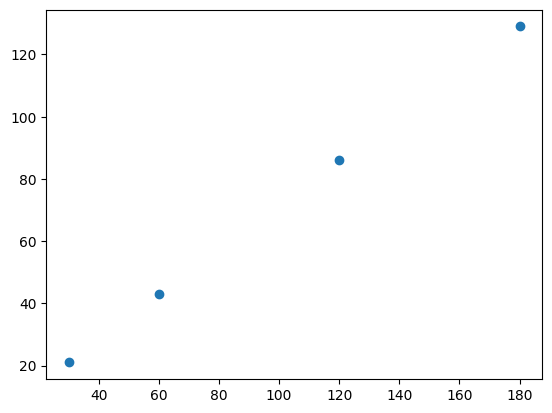

In [303]:
hr140 = df_variance[df_variance['heart_rate'] == 140]
plt.scatter(hr140['duration'], hr140['effort_score'])

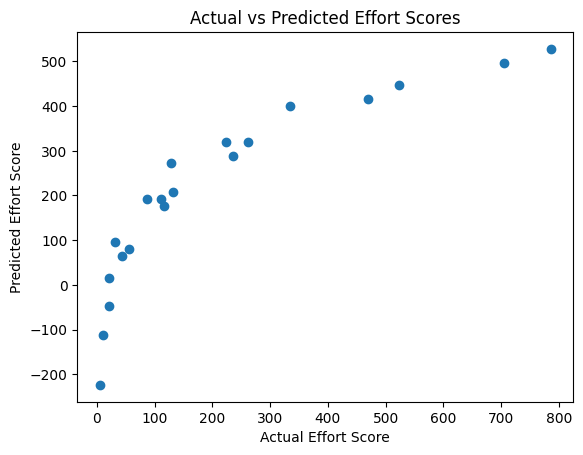

In [297]:
# Transform the input variables by taking the logarithm
X = np.log(df_variance[['duration', 'heart_rate', 'ratio']])
y = df_variance['effort_score']

# Fit a linear regression model to the transformed data
model = LinearRegression()
model.fit(X, y)

# Make predictions on the transformed input data
y_pred = model.predict(X)

# Plot the actual and predicted effort scores
plt.scatter(y, y_pred)
plt.xlabel('Actual Effort Score')
plt.ylabel('Predicted Effort Score')
plt.title('Actual vs Predicted Effort Scores')
plt.show()

In [298]:
# Calculate R-squared
r_sq = model.score(X, y)

# Print R-squared
print('R-squared:', r_sq)

R-squared: 0.747571440600767


In [ ]:
if heart_rate < 113:
    zone = 1
elif 113 <= heart_rate <= 150:
    zone=2
elif 150 <= heart_rate <= 168:
    zone=3
elif 168 <= heart_rate <= 187:
    zone=4
elif heart_rate > 187:
    zone=5

In [452]:
import numpy as np
from scipy.optimize import least_squares

# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    return duration * 3 * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 60, 120, 180])
heart_rate = np.array([160, 160, 160, 160])
effort_score = np.array([55, 111, 223, 334])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.3156105528993882, b=1.0377784430017594


In [456]:
trimp(180, 160, a, b)

333.9999934662883

In [439]:
import numpy as np
from scipy.optimize import least_squares

# Define the TRIMP function
def trimp(duration, heart_rate, a, b):
    lactate_threshold = 0.85  # assume lactate threshold is 85% of max heart rate
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

# Define the error function to minimize
def residuals(params):
    a, b = params
    y_pred = trimp(duration, heart_rate, a, b)
    return y_pred - effort_score

# Define the observed data
duration = np.array([30, 30, 30, 60, 60, 60, 120, 120, 120, 180, 180, 180])
heart_rate = np.array([110, 140, 160, 110, 140, 160, 110, 140, 160, 110, 140, 160])
effort_score = np.array([5, 21, 55, 10, 43, 111, 21, 86, 223, 32, 129, 334])

# Perform the optimization
result = least_squares(residuals, x0=[1, 1])
a, b = result.x

print(f"a={a}, b={b}")


a=0.0034036685987021155, b=7.826155579728457


In [440]:
def trimp(duration, heart_rate, a, b):
    lactate_threshold = 0.85  # assume lactate threshold is 85% of max heart rate
    return duration * heart_rate / 193 * a * np.exp(b * heart_rate / 193)

### TRY 3/09

In [423]:
df_try = activities.copy()
df_try = df_try[['name', 'distance', 'moving_time', 'average_heartrate', 'relative_effort',	'time_z1',	'time_z2',	'time_z3',	'time_z4',	'time_z5']]

In [439]:
df_try['sum_zones'] = df_try['time_z1']*1 + df_try['time_z2']*2 + df_try['time_z3']*3 + df_try['time_z4']*4 + df_try['time_z5']*5
df_try

,name,distance,moving_time,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,sum_zones,zone_time
0,5kms_118bpm,5000.0,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,30.0
1,10kms_150bpm,10000.0,3600,150.0,85.0,0.0,0.0,1.0,0.0,0.0,3.0,75.0
2,5kms_150bpm,5000.0,1800,150.0,42.0,0.0,0.0,1.0,0.0,0.0,3.0,37.5
3,10kms_170bpm,10000.0,3600,170.0,169.0,0.0,0.0,0.0,1.0,0.0,4.0,90.0
4,10kms_120bpm,10000.0,3600,120.0,12.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,5kms_118bpm,5000.0,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,30.0
76,30kms_113bpm,30000.0,10800,113.0,34.0,0.0,1.0,0.0,0.0,0.0,2.0,180.0
77,20kms_113bpm,20000.0,7200,113.0,22.0,0.0,1.0,0.0,0.0,0.0,2.0,120.0
78,10kms_113bpm,10000.0,3600,113.0,11.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0


In [441]:
hr_data

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,96.0,113.0,< 113
1,2,Moderate,113.0,150.0,113 - 150
2,3,Tempo,150.0,168.0,150 - 168
3,4,Threshold,168.0,187.0,168 - 187
4,5,Anaerobic,187.0,inf,>187


In [440]:
df_try['zone_time'] = df_try['sum_zones'] * df_try['moving_time']/60
df_try

,name,distance,moving_time,average_heartrate,relative_effort,time_z1,time_z2,time_z3,time_z4,time_z5,sum_zones,zone_time
0,5kms_118bpm,5000.0,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0
1,10kms_150bpm,10000.0,3600,150.0,85.0,0.0,0.0,1.0,0.0,0.0,3.0,180.0
2,5kms_150bpm,5000.0,1800,150.0,42.0,0.0,0.0,1.0,0.0,0.0,3.0,90.0
3,10kms_170bpm,10000.0,3600,170.0,169.0,0.0,0.0,0.0,1.0,0.0,4.0,240.0
4,10kms_120bpm,10000.0,3600,120.0,12.0,0.0,1.0,0.0,0.0,0.0,2.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,5kms_118bpm,5000.0,1800,118.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,60.0
76,30kms_113bpm,30000.0,10800,113.0,34.0,0.0,1.0,0.0,0.0,0.0,2.0,360.0
77,20kms_113bpm,20000.0,7200,113.0,22.0,0.0,1.0,0.0,0.0,0.0,2.0,240.0
78,10kms_113bpm,10000.0,3600,113.0,11.0,0.0,1.0,0.0,0.0,0.0,2.0,120.0
